In [167]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rc
from numpy import linalg as LA
import csv
import sqlite3
from sqlite3 import Error
from pandas import DataFrame
from statistics import mean 
from scipy.stats import sem
from scipy.stats import t
import re
from matplotlib.pyplot import text
import statistics
import math

In [168]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [169]:
def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return h

In [170]:
def autolabel(rects,ax, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [171]:
def create_connection(db_file):
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
    return None

In [172]:
def selectMeanThroughput(conn,ModuleName):
    df=pd.read_sql_query("SELECT avg(v.scalarValue) th FROM scalar v where v.scalarName='throughput:mean' and  v.scalarValue NOT NULL  and v.moduleName like ('%' || ? || '%')",conn,params=(ModuleName,))
    return df

In [173]:
def selectThroughputFromVec(conn,ModuleName):
    df=pd.read_sql_query("SELECT v.moduleName nodeId,vd.simTimeRaw*0.000000000001 time, vd.value th FROM vector v INNER JOIN vectordata vd ON vd.vectorId=v.vectorId and v.vectorName='throughput:vector' and v.moduleName like ('%' || ? || '%') where time > 10.0",conn,params=(ModuleName,))
    return df

In [174]:
def getThroughputFromVec(path,ModuleName):
    conex=create_connection(path)
    throughput=selectThroughputFromVec(conex,ModuleName)
    return throughput

###  Decider test

In [175]:
resPath='/home/mouna1/myGitDepot/HeteroSIM/HeteroSIM/simulations/results/'
configName='deciderTest'
pathToResult=resPath+configName+'-packetLength=50,bitrate=9,nbrTrs=3-#0.vec'
thCar0=getThroughputFromVec(pathToResult,".car[0].applLayer[0]")
thCar1=getThroughputFromVec(pathToResult,".car[2].applLayer[0]")

Text(0, 0.5, 'Throughput (bps)')

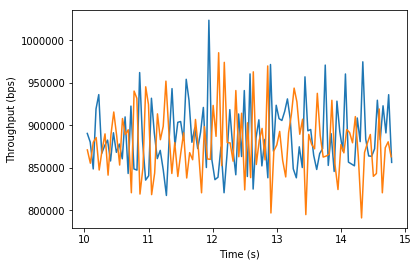

In [176]:
plt.plot(thCar0['time'],thCar0['th'],label="car without decision (802.11p)")
plt.plot(thCar1['time'],thCar1['th'],label="car with decision")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (bps)")